In [2]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

pio.renderers.default = 'iframe'

pio.templates['ck_template'] = go.layout.Template(
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font=dict(family='Calibri Light'),
    layout_title_font = dict(family='Calibri'),
    layout_hoverlabel_font = dict(family='Calibri Light')
)

pio.templates.default = 'ck_template+gridon'

In [3]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

In [4]:
data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0099_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Sus Coolez,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


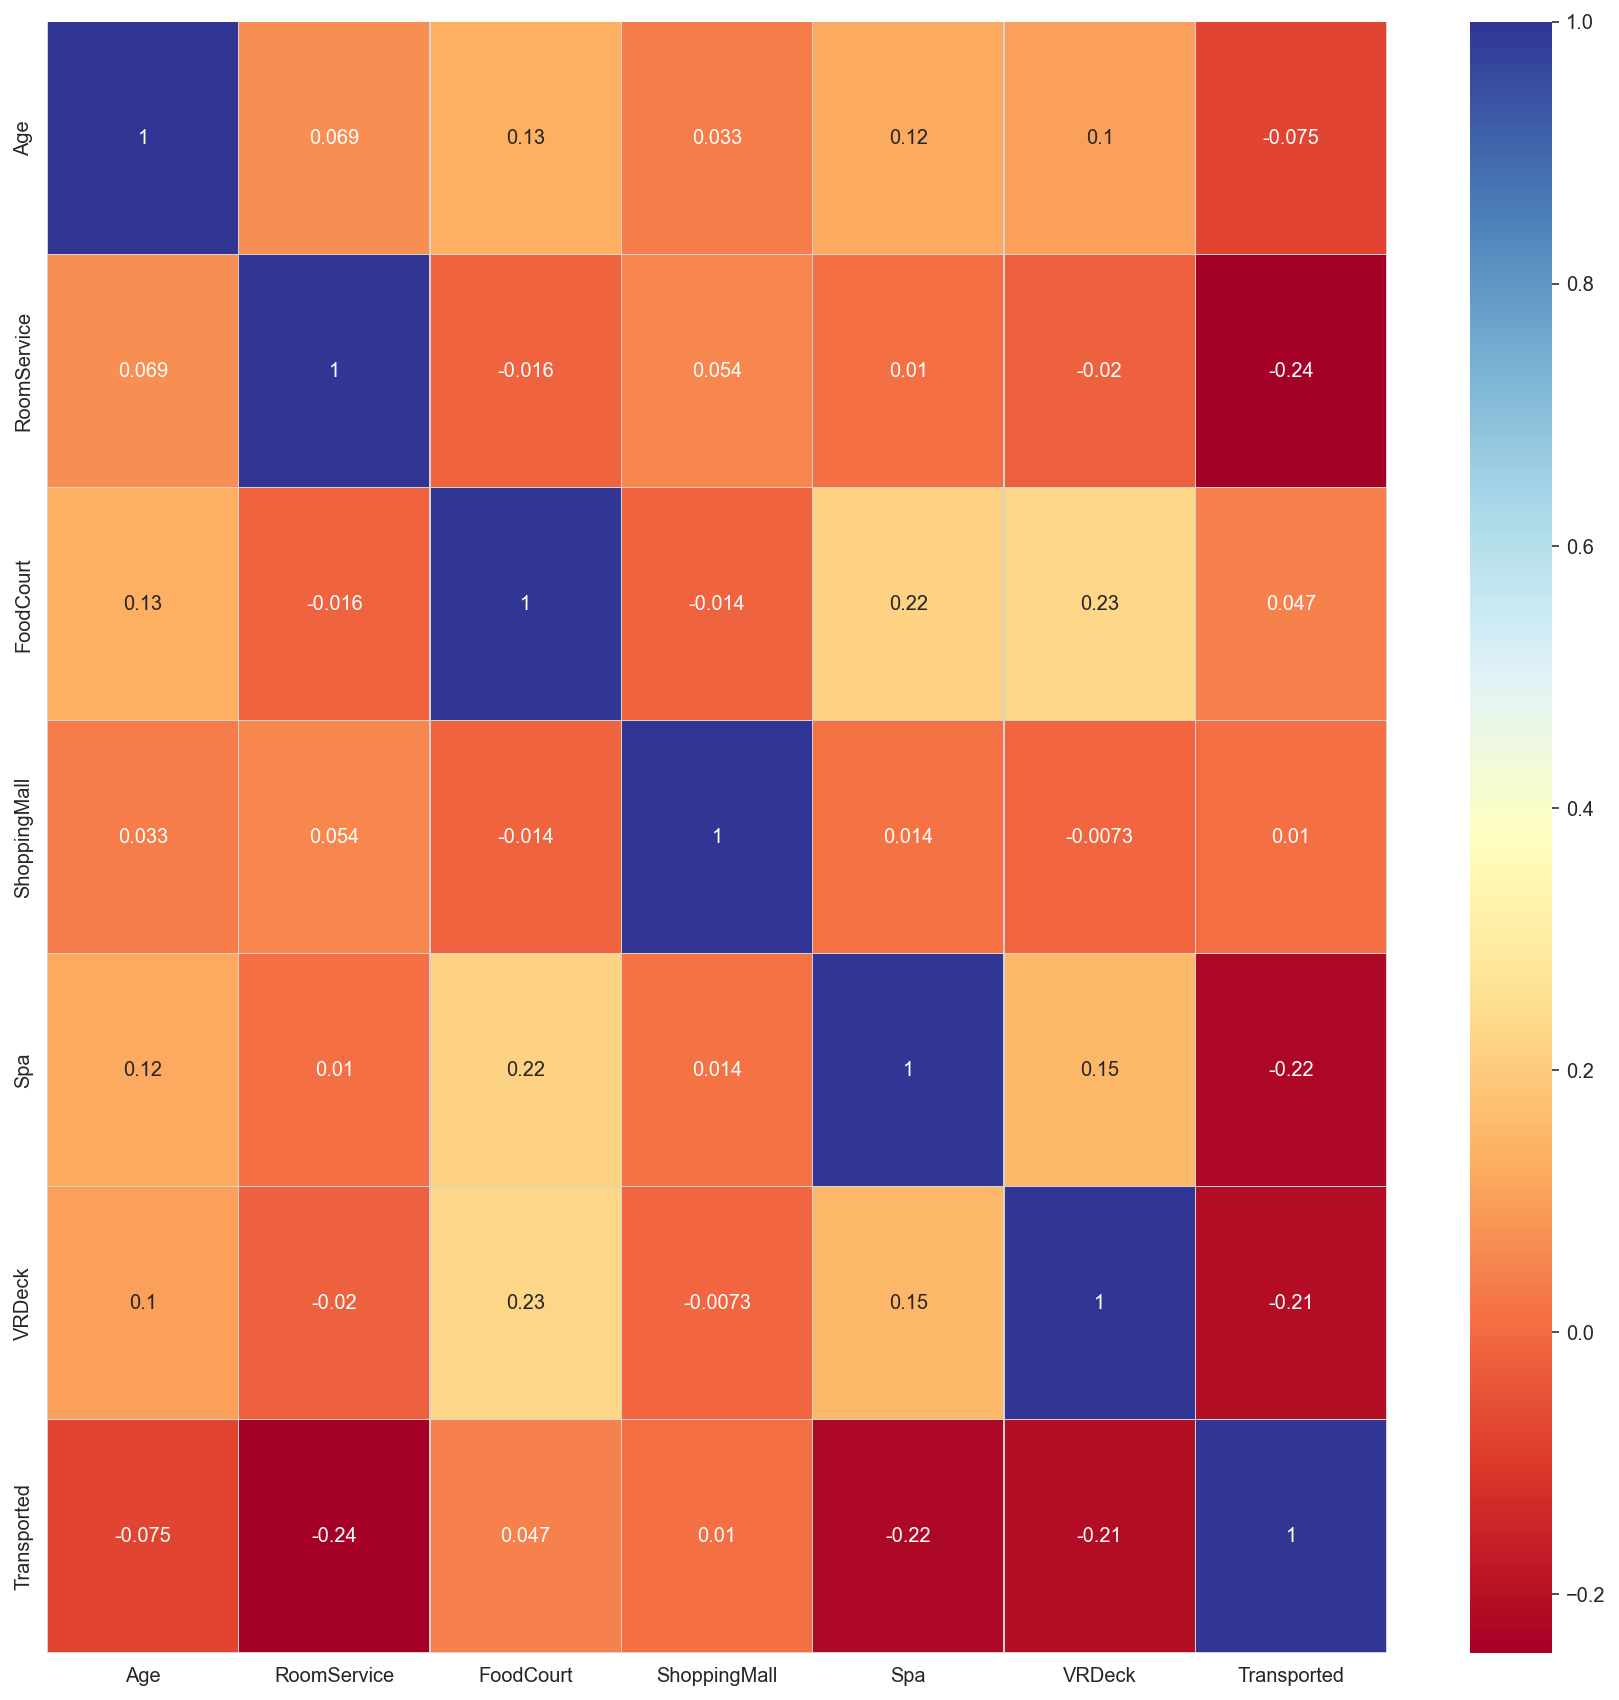

In [9]:
plt.figure(figsize=(15,15))
threshold = 0.00
sns.set_style('whitegrid', {'axes.facecolor': "0"})
df_cluster2 = data.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [10]:
from plotly.subplots import make_subplots
norm_width = 1.5
high_width = 2.5

title_set=[]
secondary_Y=[]
for feature in df.columns:
    title_set.append(feature)
    
fig = make_subplots(rows=len(df.columns),
                    cols=1,
                    subplot_titles=title_set,
                    # specs=secondary_Y
                   )

fig.update_layout(title="Comparison of Labels",
                  height=400*len(df.columns),
                  showlegend=False,
                 )
i = 0    
for feature in df.columns:
    i+=1 
    x0 = df[feature][df['Transported']==0]
    x1 = df[feature][df['Transported']==1]
    hist_data = [x0, x1]
    group_labels = ['Label 0','Label 1']
    
    try:
        
        fig.add_trace(go.Violin(y=x0,
                                x=df['Transported'],
                                jitter=0.3,
                                # points='all',
                                meanline_visible=True,
                                # opacity=0.3,
                                  )
                      ,row=i, col=1,secondary_y=False,)  
          
    except:
        pass
fig.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = make_subplots()
fig.add_trace(go.histogram2d(data_frame=data, x='TotalSpended', labels='VIP'))
fig.show()

TypeError: 'module' object is not callable

In [2]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data[['id', 'num']] = data.PassengerId.str.split('_', -1, expand=True)
explore = data.PassengerId.str.split('_', -1, expand=True)
data_prep = pd.DataFrame()
data_prep[['id','cum']] = explore.groupby(0).count().reset_index()
data = pd.merge(data, data_prep, how='inner', on='id')
data['Status'] = 'empty'
data.loc[data.cum == 1, 'Status'] = 1
data.loc[data.cum != 1, 'Status'] = 0
# data.loc[data.cum == 2, 'Status'] = 'couple'
# data.loc[data.cum == 3, 'Status'] = 'family'
# data.loc[data.cum > 3, 'Status'] = 'tourist group'

test[['id', 'num']] = test.PassengerId.str.split('_', -1, expand=True)
test_explore = test.PassengerId.str.split('_', -1, expand=True)
test_prep = pd.DataFrame()
test_prep[['id','cum']] = test_explore.groupby(0).count().reset_index()
test = pd.merge(test, test_prep, how='inner', on='id')
test['Status'] = 'empty'
test.loc[test.cum == 1, 'Status'] = 1
test.loc[test.cum != 1, 'Status'] = 0
# test.loc[test.cum == 2, 'Status'] = 'couple'
# test.loc[test.cum == 3, 'Status'] = 'family'
# test.loc[test.cum > 3, 'Status'] = 'tourist group'

In [4]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id,num,cum,Status
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,1,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,1,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,1,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,2,0


In [5]:
#check data shape
data.shape

(8693, 18)

In [13]:
#fill missing CryoSleep data with True for those not spending any money
#fill missing spenditure data of kids under 13 with zero spending
data['TotalSpended'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']
test['TotalSpended'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
data.loc[(data['CryoSleep'].isnull()) 
         & (data['TotalSpended'] <= 0), 'CryoSleep'] = True
test.loc[(test['CryoSleep'].isnull()) 
         & (test['TotalSpended'] <= 0), 'CryoSleep'] = True

data.loc[(data['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (data['Age'] <= 13.5), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0
test.loc[(test['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (test['Age'] <= 13.5), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0

In [7]:
#spending status
data['Consumption'] = 0
data.loc[data.TotalSpended>0, 'Consumption'] = 1
data.loc[data.TotalSpended<=0, 'Consumption'] = 0

test['Consumption'] = 0
test.loc[test.TotalSpended>0, 'Consumption'] = 1
test.loc[test.TotalSpended<=0, 'Consumption'] = 0

In [8]:
#fill nan with median numbers
data = data.fillna(data.median(axis=0))
test = test.fillna(test.median(axis=0))

In [9]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars' nan]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [10]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id,num,cum,Status,TotalSpended,Consumption
HomePlanet,,,,,,,,,,,,,,,,,,,
Earth,4602,4602,4507,4503,4602,4602,4602,4602,4602,4602,4602,4496,4602,4602,4602,4602,4602,4602,4602
Europa,2131,2131,2070,2094,2131,2131,2131,2131,2131,2131,2131,2085,2131,2131,2131,2131,2131,2131,2131
Mars,1759,1759,1722,1717,1759,1759,1759,1759,1759,1759,1759,1718,1759,1759,1759,1759,1759,1759,1759


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id,num,cum,Status,TotalSpended,Consumption
Destination,,,,,,,,,,,,,,,,,,,
55 Cancri e,1800,1769,1800,1750,1800,1800,1800,1800,1800,1800,1800,1757,1800,1800,1800,1800,1800,1800,1800
PSO J318.5-22,796,780,796,778,796,796,796,796,796,796,796,779,796,796,796,796,796,796,796
TRAPPIST-1e,5915,5765,5915,5788,5915,5915,5915,5915,5915,5915,5915,5779,5915,5915,5915,5915,5915,5915,5915


In [11]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [12]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [13]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6561, False)

In [14]:
#split cabin into multiple columns
data[['A','B','C']] = data.Cabin.str.split('/', -1, expand=True)
test[['A','B','C']] = test.Cabin.str.split('/', -1, expand=True)

In [15]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,id,num,cum,Status,TotalSpended,Consumption,B,C
A,,,,,,,,,,,,,,,,,,,,,
A,256,256,256,256,256,256,256,256,256,256,...,249,256,256,256,256,256,256,256,256,256
B,779,779,779,779,779,779,779,779,779,779,...,763,779,779,779,779,779,779,779,779,779
C,747,747,747,747,747,747,747,747,747,747,...,733,747,747,747,747,747,747,747,747,747
D,478,478,478,478,478,478,478,478,478,478,...,468,478,478,478,478,478,478,478,478,478
E,876,876,876,876,876,876,876,876,876,876,...,857,876,876,876,876,876,876,876,876,876
F,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,...,2721,2794,2794,2794,2794,2794,2794,2794,2794,2794
G,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,...,2501,2559,2559,2559,2559,2559,2559,2559,2559,2559
T,5,5,5,5,5,5,5,5,5,5,...,4,5,5,5,5,5,5,5,5,5


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,id,num,cum,Status,TotalSpended,Consumption,A,C
B,,,,,,,,,,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,...,17,18,18,18,18,18,18,18,18,18
1,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
10,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
100,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
1000,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
997,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,id,num,cum,Status,TotalSpended,Consumption,A,B
C,,,,,,,,,,,,,,,,,,,,,
P,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,...,4112,4206,4206,4206,4206,4206,4206,4206,4206,4206
S,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,...,4184,4288,4288,4288,4288,4288,4288,4288,4288,4288


In [16]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [17]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [18]:
#view data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,id,num,cum,Status,TotalSpended,Consumption,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,01,1,1,0.0,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,01,1,1,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,01,2,0,10383.0,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,02,2,0,5176.0,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,01,1,1,1091.0,1,F,1,S


In [19]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'id', 'num', 'cum', 'Status', 'TotalSpended',
       'Consumption', 'A', 'B', 'C'],
      dtype='object')

In [20]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
        'A', 'B', 'C']]

In [21]:
#view data
display(data)

,HomePlanet,CryoSleep,Destination,Age,Consumption,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,C
0,Europa,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,Europa,False,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [22]:
len(data.A.unique())

8

In [23]:
data.B = data.B.astype('int')
test.B = test.B.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   Consumption   8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  A             8693 non-null   object 
 11  B             8693 non-null   int32  
 12  C             8693 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 916.8+ KB


In [24]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [25]:
data.columns

Index(['Age', 'Consumption', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'B', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'A_A', 'A_B', 'A_C', 'A_D', 'A_E', 'A_F',
       'A_G', 'A_T', 'C_P', 'C_S'],
      dtype='object')

In [26]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [27]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [28]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

looks clustered labels are more effective

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

epochs = 100
model_list = []
scores = []
for e in range(epochs):
    X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)
    model = SVC(class_weight='balanced')
    model.fit(X_train, X_test)
    prediction = model.predict(y_train)
    score = accuracy_score(prediction, y_test)
    scores.append(score)
    model_list.append(model)
    print(score, sep='\n')

0.7943882244710212
0.7856485740570377
0.8077276908923643
0.8146274149034038
0.7994480220791168
0.7943882244710212
0.7920883164673413
0.7856485740570377
0.7920883164673413
0.8012879484820608
0.8049678012879485
0.7953081876724931
0.8026678932842686
0.8035878564857406
0.796688132474701
0.7930082796688133
0.8040478380864765
0.8104875804967802
0.8017479300827967
0.7920883164673413
0.8049678012879485
0.7994480220791168
0.7920883164673413
0.7999080036798528
0.81278748850046
0.7999080036798528
0.796688132474701
0.81278748850046
0.8081876724931003
0.8109475620975161
0.7907083716651334
0.8114075436982521
0.7870285188592456
0.7888684452621895
0.8072677092916284
0.7884084636614536
0.8118675252989881
0.7948482060717571
0.8049678012879485
0.8072677092916284
0.7907083716651334
0.7943882244710212
0.8104875804967802
0.796688132474701
0.796228150873965
0.8063477460901564
0.8003679852805887
0.8012879484820608
0.8100275988960441
0.8035878564857406
0.8045078196872125
0.8003679852805887
0.7925482980680773
0

In [30]:
max(scores)

0.8206071757129715

In [31]:
np.savetxt('result3.txt', model_list[np.argmax(scores)].predict(test), fmt='%s')